<a href="https://colab.research.google.com/github/NasserKishek/Prediction-of-Product-Sales-/blob/main/Prediction_of_product_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Nasser

## Project Overview


## Load and Inspect Data


In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
fpath = "/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [108]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [109]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


## Clean Data


How many rows/columns:

In [110]:
df.shape

(8523, 12)

There are 8523 rows and 12 columns

Identifying duplicated rows:

In [111]:
duplicated_rows = df.duplicated()
duplicated_rows

,0
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,False


In [112]:
df.duplicated().sum()

np.int64(0)

In [113]:
df[duplicated_rows]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


There is no duplicated rows

Checking for missing values:

In [114]:
df.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [115]:
null_sums = df.isna().sum()
null_sums

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [116]:
null_percent = null_sums/len(df) * 100
null_percent

,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


In [117]:
null_percent[null_percent>0]

,0
Item_Weight,17.165317
Outlet_Size,28.276428


- There are 1463 missing values in "Item_Weight" column (17.17%)
- There are 2410 missing values in "Outlet_size" column (28.28%)

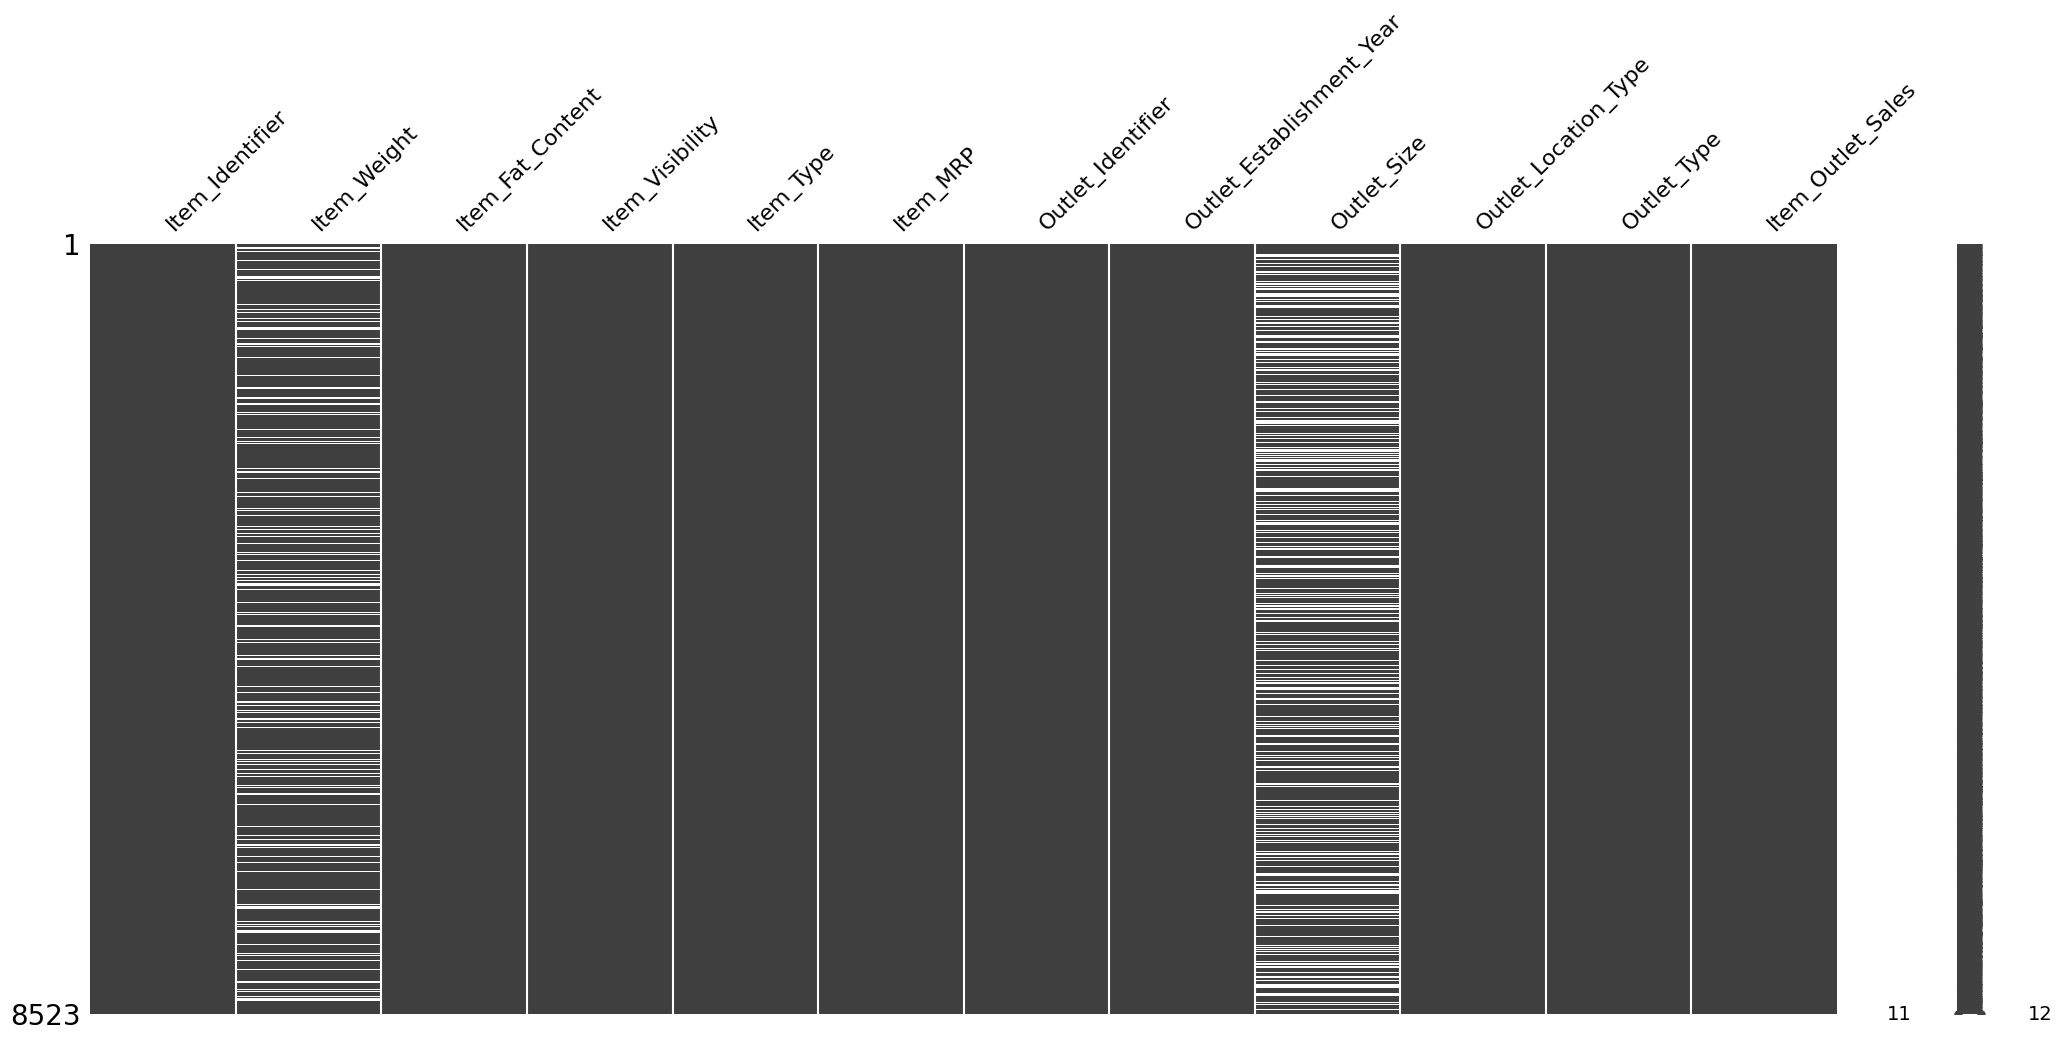

In [118]:
import missingno as msno
msno.matrix(df);

In [119]:
cat_cols = df.select_dtypes('object').columns
num_cols = df.select_dtypes('number').columns

In [120]:
df['Item_Weight'].isna().sum()

np.int64(1463)

In [121]:
df['Outlet_Size']

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,NaN
4,High
...,...
8518,High
8519,NaN
8520,Small
8521,Medium


- For string columns we will fill the null values with "MISSING"
- For numerical columns we will fill the null values with -1

In [122]:
df[cat_cols] = df[cat_cols].fillna("MISSING")
df[num_cols] = df[num_cols].fillna(-1)

Checking for any remaining null values:

In [123]:
cleaned_null_sums = df.isna().sum()
cleaned_null_sums

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


Double check for Item_weight column:

In [124]:
df['Item_Weight'].isna().sum()

np.int64(0)

Double check for Outlet_size column:

In [125]:
df['Outlet_Size'].isna().sum()

np.int64(0)

We will now Inspect Categorical Columns & Address Inconsistent Values:

In [126]:
for col in cat_cols:
  print(f'Value Counts for {col}')
  print(df[col].value_counts())
  print('\n')

Value Counts for Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Value Counts for Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Value Counts for Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013

We noticed inconcsistency in Item_Fat_Content column

In [127]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


- Low Fat, LF, and low fat are the same
- Regular, and reg are the same

Now we will combine these values together:

In [128]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [129]:
summary_stats = df.select_dtypes(include='number').describe()
summary_stats

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [131]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Histogram for Item_Outlet_Sales:

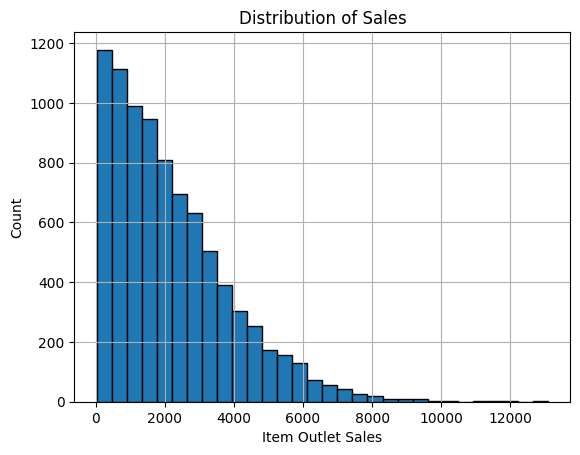

In [132]:
ax = df['Item_Outlet_Sales'].hist(bins = 30, edgecolor = 'black')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Sales')
ax.set_ylabel('Count')
ax.set_xlabel('Item Outlet Sales');

- We can see that most sales value are concentrated on the lower end (below 4000).
- Most Items experience low/moderate sales, while few achieve high sales.

Box Plot for Item_Outlet_Sales:

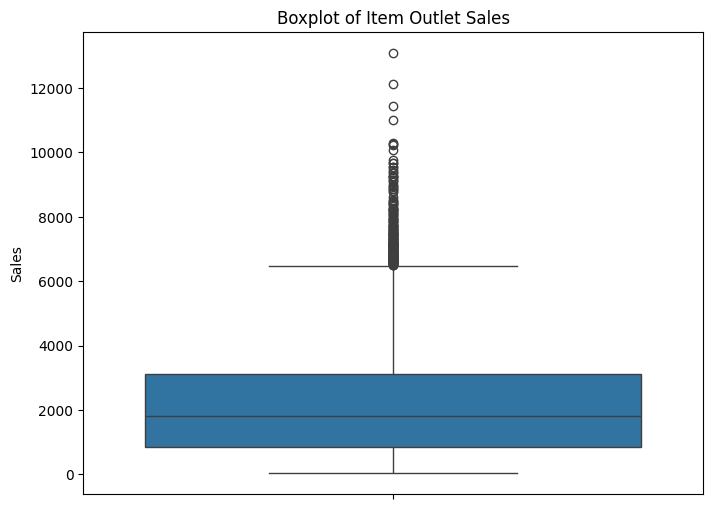

In [133]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(data=df, y='Item_Outlet_Sales')
plt.title('Boxplot of Item Outlet Sales')
plt.ylabel('Sales');

For this boxplot we can see the following insights:
- The median is around 1800 - 2000, however the the range is up to 12,000 unit.
- There is a huge number of outliers with high sales (Between 7000 - 12,000).

Box Plot for Item_MRP:

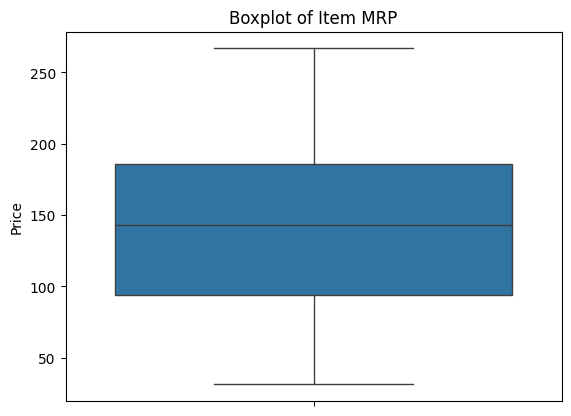

In [134]:
ax = sns.boxplot(data=df, y='Item_MRP')
plt.title('Boxplot of Item MRP')
plt.ylabel('Price');

- The median is approximatly centered, which indicates that the Item MRP is evenly distributed.
- There is no major outliers.


Countplots for the categorial features:

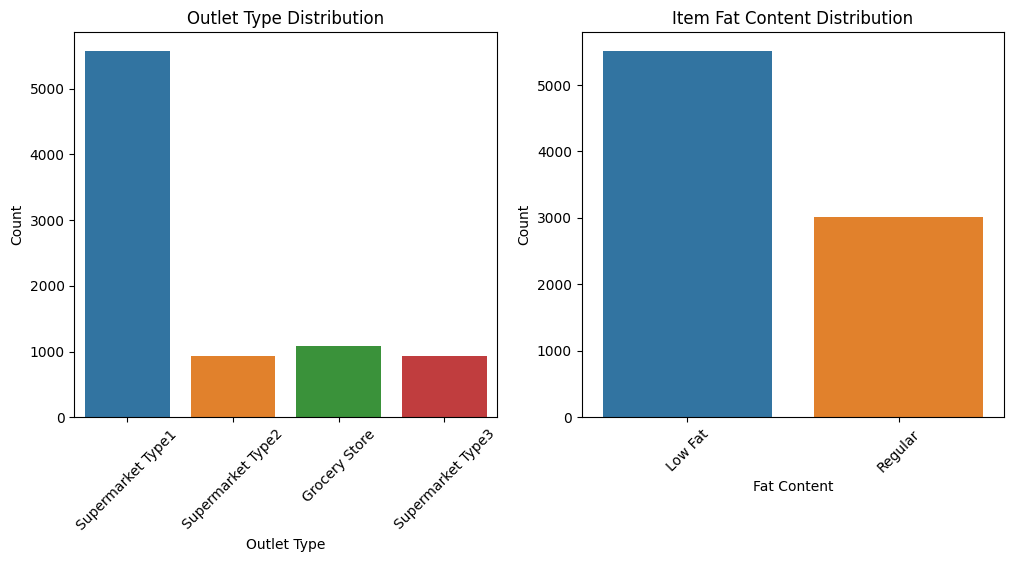

In [135]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Countplot 1:

sns.countplot(data=df, x='Outlet_Type', hue='Outlet_Type', ax=axes[0])
axes[0].set_title('Outlet Type Distribution')
axes[0].set_xlabel('Outlet Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Countplot 2:
sns.countplot(data=df, x='Item_Fat_Content', hue='Item_Fat_Content', ax=axes[1])
axes[1].set_title('Item Fat Content Distribution')
axes[1].set_xlabel('Fat Content')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45);

Outlet Type Distribution:
- The chart clearly shows that Supermarket Type1 is by far the most common outlet type in the dataset, with over 5,500 record.
- Other outlet types, including Supermarket Type2, Type3, and Grocery Store, appear far less frequently (each < 1,200 entries).
- Businesses may prioritize Supermarket Type1 for promotions or stocking decisions, while considering targeted strategies to boost sales in smaller outlet types.

Item Fat Content Distribution:
- The majority of products are categorized as Low Fat, indicating a trend toward health-conscious labeling or consumer preferences.
- Regular fat products account for a significantly smaller portion, which may highlight a market trend or company strategy.


Heatmap:

In [136]:
corr = df.corr(numeric_only=True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


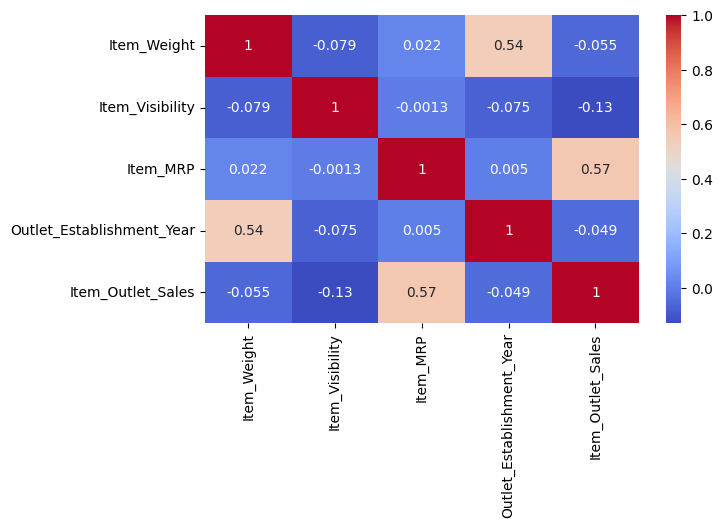

In [137]:
fig, ax = plt.subplots(figsize=(7,4))
sns.heatmap(corr, cmap='coolwarm', annot=True, ax=ax);

- Item_MRP and Item_Outlet_Sales has the strongest correlation (0.54) and it is moderately positive
- this relationship between Item MRP and Item Outlet Sales, indicates that when the MRP increases the sales tend to increase. This could be because higher MRP items are more appealing, of higher quality, or because MRP reflects bundled or premium products.


## Feature Inspection

First, we will replace the placeholders we added previously with null values, so we can be fully aware of any null values present so that we can make informed choices about data preparation for machine learning:

In [138]:
# Replacing the placeholder for categorical columns.
df[cat_cols] = df[cat_cols].replace("MISSING", np.nan)

In [139]:
# Replacing the placeholder for numerical columns.
df[num_cols] = df[num_cols].replace(-1, np.nan)

In [140]:
# Confirming the changes.
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


We can see above the we have null values again for "Item_Weight" and "Outlet_Size"

Below we will add EDA Functions for Feature Inspection:

In [141]:
def explore_categorical(df, x, fillna=True, placeholder='MISSING', figsize=(6, 4), order = None):
  temp_df = df.copy()
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)*100
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  fig, ax = plt.subplots(figsize=figsize)
  sns.countplot(data=temp_df, x=x, ax=ax, hue=x, order=order)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_title(f"Column: {x}")
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc, 2)}%)")
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # first find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency if the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = (freq/ len(temp_df)*100)
  # Print the result
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common, 2)}%)")
    # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common >98:
    print(f"\n - [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant")

  return fig, ax

In [142]:
def explore_numeric(df, x, figsize=(6,5)):
  # making out figure with gridspec for subplots
  gridspec = {"height_ratios":[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, gridspec_kw=gridspec, sharex=True)
  # Histogram on top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## adjusting subplots to best fill figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  # print a message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)*100
  print(f"-NaN's Found: {null_count}({null_perc.round(2)}%)")

In [143]:
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), fillna=True, placeholder = 'MISSING', order = None):
  # Make a copy of the dataframe and fillna
  temp1_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp1_df[x] = temp1_df[x].fillna(placeholder)

  # or drop nulls to prevent unwanted 'nan' in the stripplot

  else:
    temp1_df = temp1_df.dropna(subset=[x])

  # create the figure and subplots

  fig, ax = plt.subplots(figsize= figsize)

  # Stripplot
  sns.stripplot(data=temp1_df, x=x, y=y, hue=x, ax=ax, order=order, hue_order=order,
              legend=False, edgecolor='white', linewidth= 0.5, size=3, zorder=0)
  # Barplot
  sns.barplot(data=temp1_df, x=x, y=y, hue=x, ax=ax, alpha= 0.6, order=order, hue_order=order,
              edgecolor='black', linewidth= 1, errorbar= None,)

  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

In [144]:
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs):
  # kwargs for sns.regplot
  # calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r=corr.loc[x,y]
  # plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec': 'white', 'linewidths': 1, 'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs)
  # add title with the correlation
  ax.set_title(f'{x} vs {y} (r={r})')
  # Ensure plot is shown before message
  plt.show()

  return fig, ax

Inspecting Categorical Features:

In [145]:
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Item_Identifier       8523 non-null   object
 1   Item_Fat_Content      8523 non-null   object
 2   Item_Type             8523 non-null   object
 3   Outlet_Identifier     8523 non-null   object
 4   Outlet_Size           6113 non-null   object
 5   Outlet_Location_Type  8523 non-null   object
 6   Outlet_Type           8523 non-null   object
dtypes: object(7)
memory usage: 466.2+ KB


### Feature: Item_Fat_Content

Definition: Whether the product is low_fat or regular

/tmp/ipython-input-1900719728.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


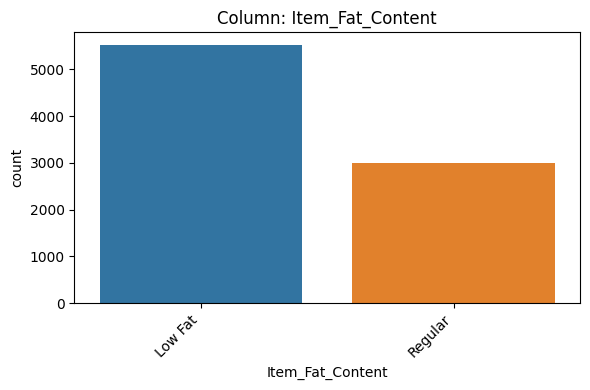

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant


In [146]:
# Univariate visualization
explore_categorical(df, x='Item_Fat_Content');

1- What type of feature is it?
- categorical (nominal)

2- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- There is no null values.

3- Is the feature constant or quasi-constant?
- No.

4- What is the cardinality? Is it high?
- 2 unique categories.
- Not high cardinality (not >10)

5- Would we know this BEFORE the target is determined?
- Yes.

6- Is there a business case/understanding reason to exclude based on our business case?
- No.

/tmp/ipython-input-2444267863.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


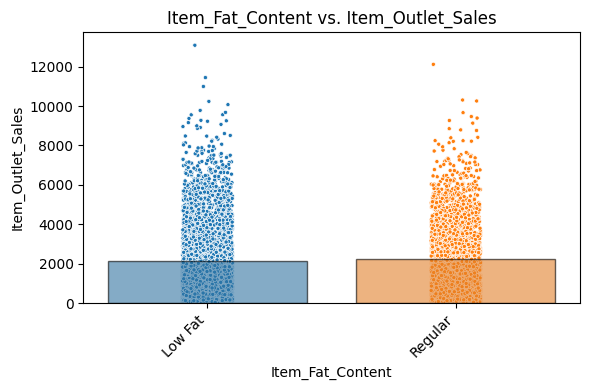

In [158]:
# Multivariate visualization
fig, ax = plot_categorical_vs_target(df, 'Item_Fat_Content', fillna=False)

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think it may influence consumer prefrences.
  - Does this feature appear to be a predictor of the target?
    - No, both Low Fat and Regular have similar distributions of Item_Outlet_Sales. Also, the mean looks identical, which means that its may not be a strong predictor.

### Feature: Item_Type

Definition: The category to which the product belongs

/tmp/ipython-input-1900719728.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


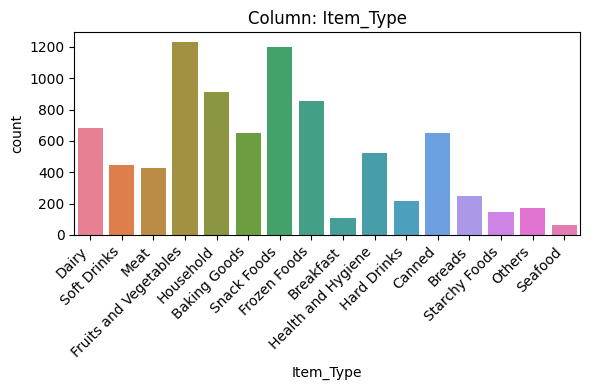

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant


In [148]:
# Univariate visualization
explore_categorical(df, x='Item_Type');

1- What type of feature is it?
- categorical (nominal)

2- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- There is no null values.

3- Is the feature constant or quasi-constant?
- No.

4- What is the cardinality? Is it high?
- 16 unique categories.
- high cardinality >10

5- Would we know this BEFORE the target is determined?
- Yes.

6- Is there a business case/understanding reason to exclude based on our business case?
- We may exclude it because of high cardinality

/tmp/ipython-input-2444267863.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


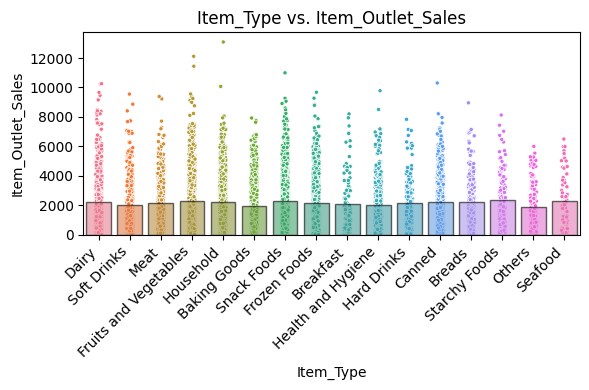

In [159]:
# Multivariate visualization
fig, ax = plot_categorical_vs_target(df, 'Item_Type', fillna=False)

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes there is some predictive power, but due to hard cardinality we will not take as predictor.

### Feature: Outlet_Size

Definition: The size of the store in terms of ground area convered

/tmp/ipython-input-1900719728.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


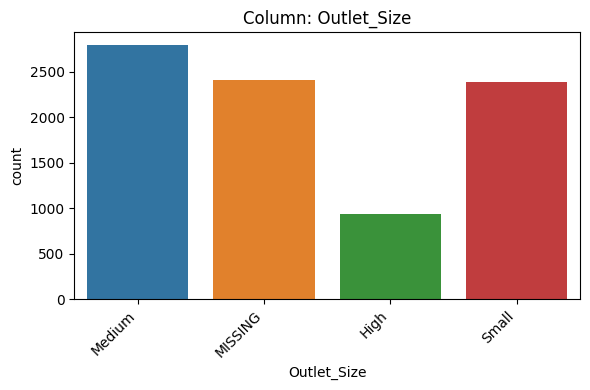

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant


In [149]:
# Univariate visualization
explore_categorical(df, x='Outlet_Size');

1- What type of feature is it?
- Ordinal

2- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- 2410 null values (28.28% of the data)
- Impute with "Missing" placeholder.

3- Is the feature constant or quasi-constant?
- No.

4- What is the cardinality? Is it high?
- 4 unique categories.
- Not high cardinality (not >10)

5- Would we know this BEFORE the target is determined?
- Yes.

6- Is there a business case/understanding reason to exclude based on our business case?
- No.

/tmp/ipython-input-2444267863.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


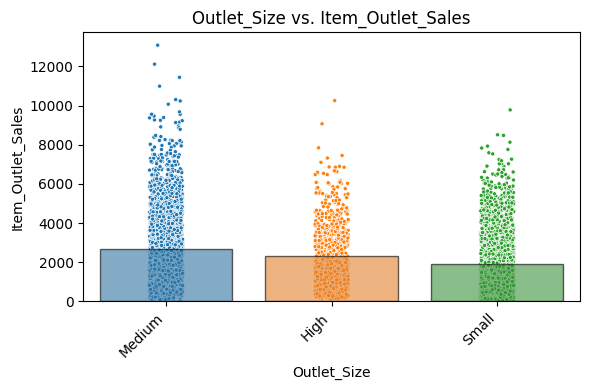

In [161]:
# Multivariate visualization
fig, ax = plot_categorical_vs_target(df, 'Outlet_Size', fillna=False)

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, we can see the outlet sales are less in small outlets than in medium and high outlets size.

### Feature: Outlet_Location_Type

Definition: The type of area in which the store is located

/tmp/ipython-input-1900719728.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


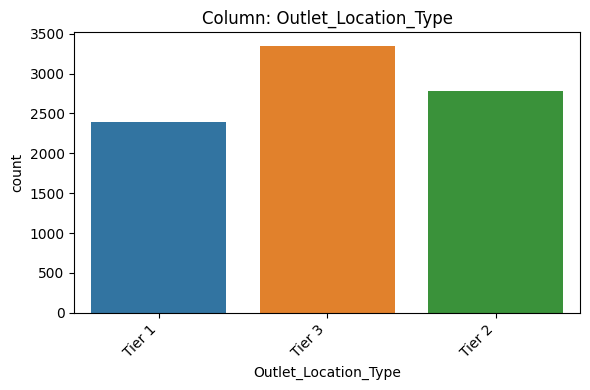

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant


In [150]:
# Univariate visualization
explore_categorical(df, x='Outlet_Location_Type');

1- What type of feature is it?
- Nominal

2- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- No null values

3- Is the feature constant or quasi-constant?
- No.

4- What is the cardinality? Is it high?
- 3 unique categories.
- Not high cardinality (not >10)

5- Would we know this BEFORE the target is determined?
- Yes.

6- Is there a business case/understanding reason to exclude based on our business case?
- No.

/tmp/ipython-input-2444267863.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


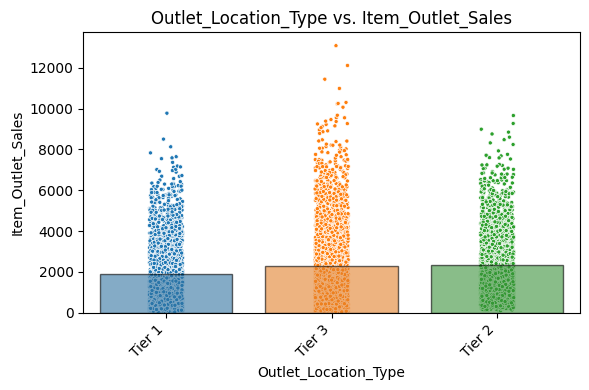

In [162]:
# Multivariate visualization
fig, ax = plot_categorical_vs_target(df, 'Outlet_Location_Type', fillna=False)

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, There is a differnce in data ditribution between the three tiers

### Feature: Outlet_Type

Definition: Whether the outlet is a grocery store or some sort of supermarket

/tmp/ipython-input-1900719728.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


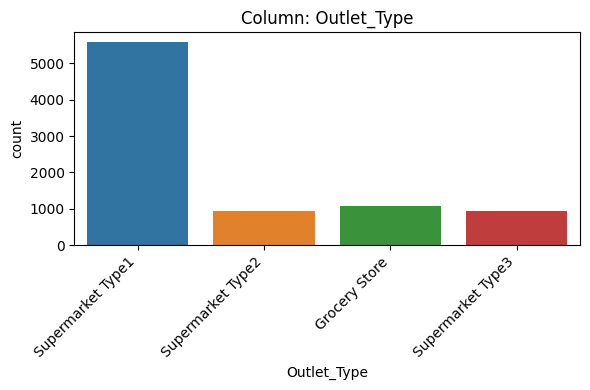

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant


In [151]:
# Univariate visualization
explore_categorical(df, x='Outlet_Type');

1- What type of feature is it?
- Nominal

2- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- No null values

3- Is the feature constant or quasi-constant?
- No.

4- What is the cardinality? Is it high?
- 4 unique categories.
- Not high cardinality (not >10)

5- Would we know this BEFORE the target is determined?
- Yes.

6- Is there a business case/understanding reason to exclude based on our business case?
- No.

/tmp/ipython-input-2444267863.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


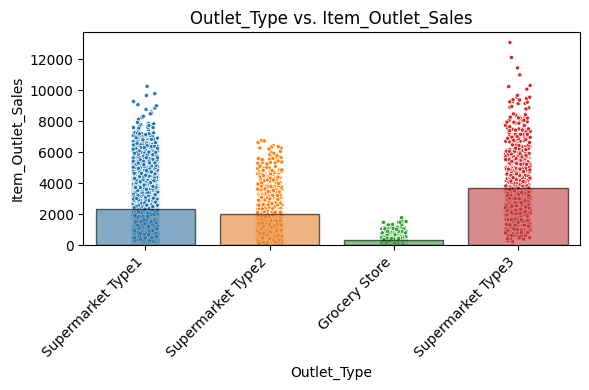

In [163]:
# Multivariate visualization
fig, ax = plot_categorical_vs_target(df, 'Outlet_Type', fillna=False)

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, We can see that Grocery Stores sell signficantly less than other type of outlets.

Inspecting Numerical Features:

In [152]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 333.1 KB


### Feature: Item_Weigh

Definition: Weight of the product

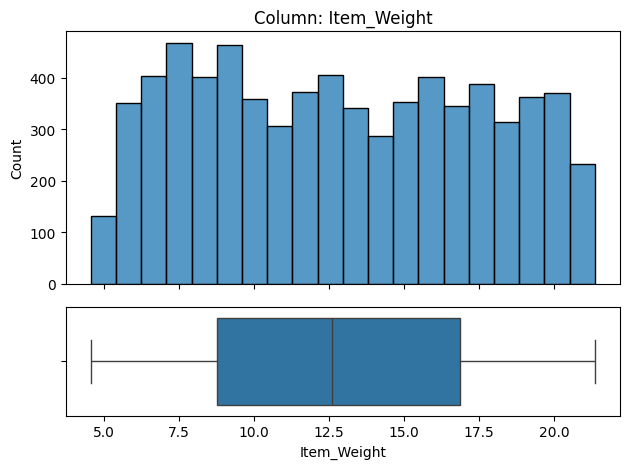

-NaN's Found: 1463(17.17%)


In [153]:
# Univariate visualization
explore_numeric(df, x='Item_Weight');

1- What type of feature is it?
- Numerical.

2- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- 1463 null values (17.17% of the data)
- Impute with the median

3- Is the feature constant or quasi-constant?
- No.

4- What is the cardinality? Is it high?
- Not applicable (numeric).

5- Would we know this BEFORE the target is determined?
- Yes.

6- Is there a business case/understanding reason to exclude based on our business case?
- No.

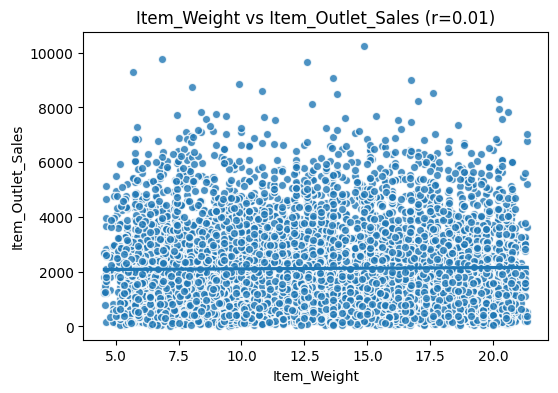

In [166]:
# Multivariate visualization
fig, ax = plot_numeric_vs_target(df, 'Item_Weight')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No, but usually Item Weight affect other features that may affect Item_Outlet_Sales.
  - Does this feature appear to be a predictor of the target?
    - No, there is very weak relationship (almost = 0) between Item_Weight and Item_Outlet_Sales.

### Feature: Item_Visibility

Definition: The percentage of total display area of all products in a store allocated to particular product.

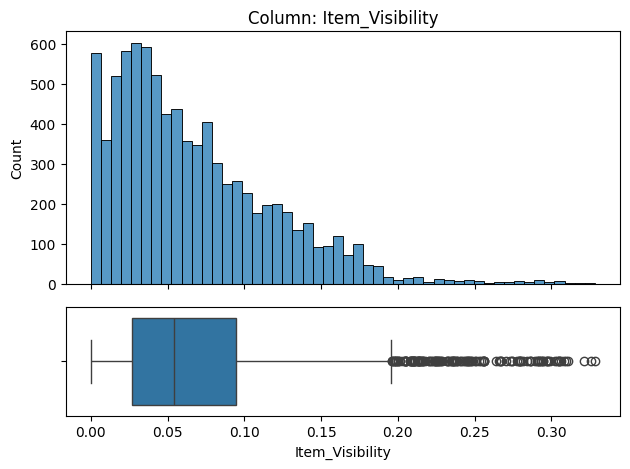

-NaN's Found: 0(0.0%)


In [154]:
# Univariate visualization
explore_numeric(df, x='Item_Visibility');

1- What type of feature is it?
- Numerical.

2- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- No null values

3- Is the feature constant or quasi-constant?
- No.

4- What is the cardinality? Is it high?
- Not applicable (numeric).

5- Would we know this BEFORE the target is determined?
- Yes.

6- Is there a business case/understanding reason to exclude based on our business case?
- No.

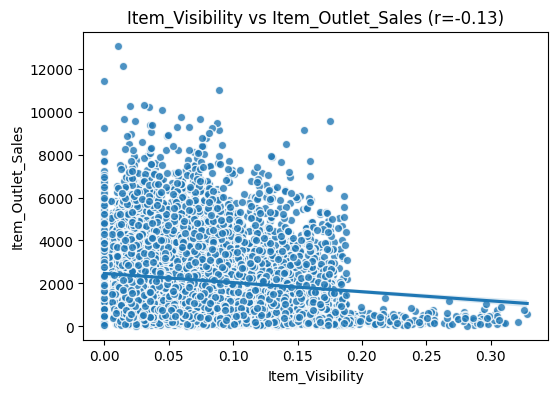

In [167]:
# Multivariate visualization
fig, ax = plot_numeric_vs_target(df, 'Item_Visibility')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, but it is weak negative relationship.

### Feature: Item_MRP

Definition: Maximum Retail Price (list Price) of the product

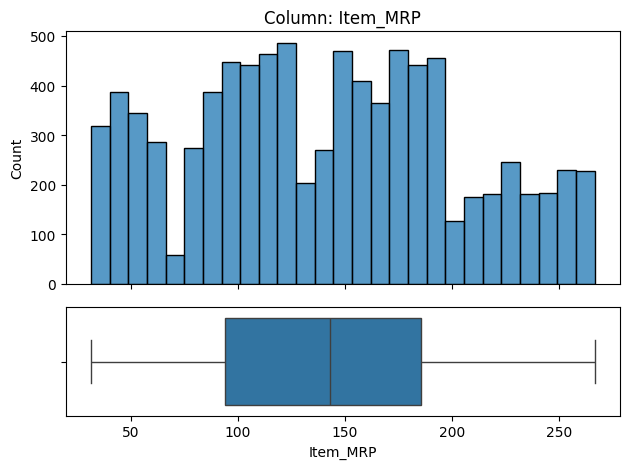

-NaN's Found: 0(0.0%)


In [155]:
# Univariate visualization
explore_numeric(df, x='Item_MRP');

1- What type of feature is it?
- Numerical.

2- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- No null values

3- Is the feature constant or quasi-constant?
- No.

4- What is the cardinality? Is it high?
- Not applicable (numeric).

5- Would we know this BEFORE the target is determined?
- Yes.

6- Is there a business case/understanding reason to exclude based on our business case?
- No.

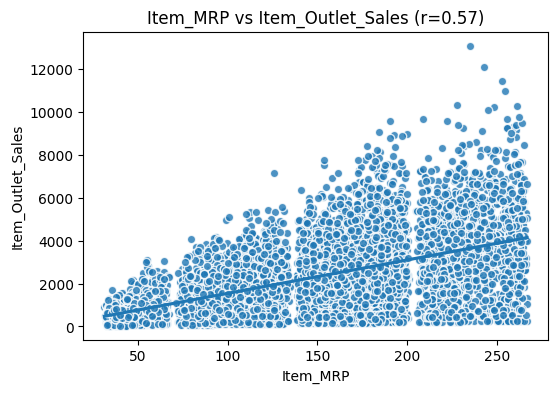

In [168]:
# Multivariate visualization
fig, ax = plot_numeric_vs_target(df, 'Item_MRP')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, clearly there is a strong relationship.

### Feature: Outlet_Establishment_Year

Definition: The year in which store was established

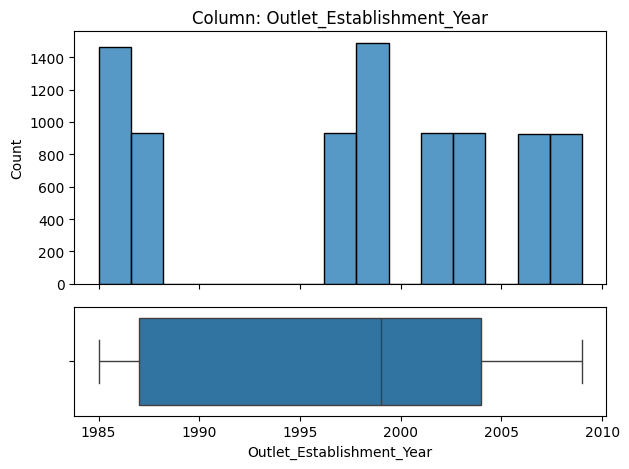

-NaN's Found: 0(0.0%)


In [156]:
# Univariate visualization
explore_numeric(df, x='Outlet_Establishment_Year');

1- What type of feature is it?
- Numerical.

2- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- No null values

3- Is the feature constant or quasi-constant?
- No.

4- What is the cardinality? Is it high?
- Not applicable (numeric).

5- Would we know this BEFORE the target is determined?
- Yes.

6- Is there a business case/understanding reason to exclude based on our business case?
- No.

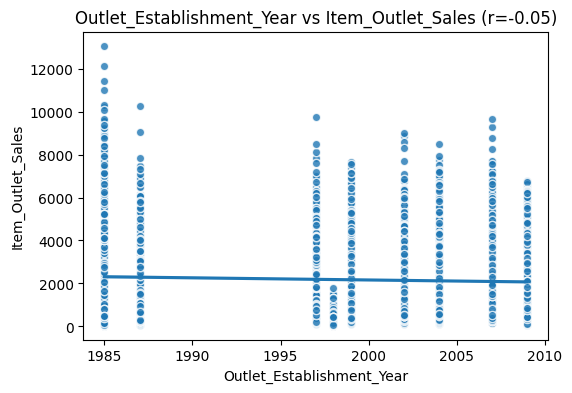

In [169]:
# Multivariate visualization
fig, ax = plot_numeric_vs_target(df, 'Outlet_Establishment_Year')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No.
  - Does this feature appear to be a predictor of the target?
    - There is no relationship between establishment year and out target (correlation almost = 0).

### Feature: Item_Outlet_Sales

Definition: Sales of the product in particular store. This is the target variable to be predicted

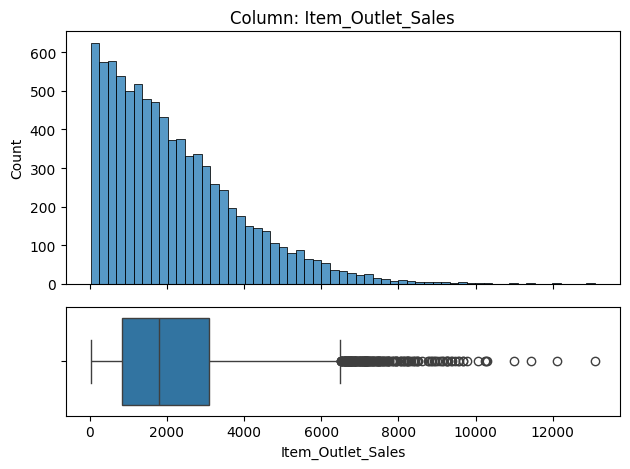

-NaN's Found: 0(0.0%)


In [157]:
# Univariate visualization
explore_numeric(df, x='Item_Outlet_Sales');